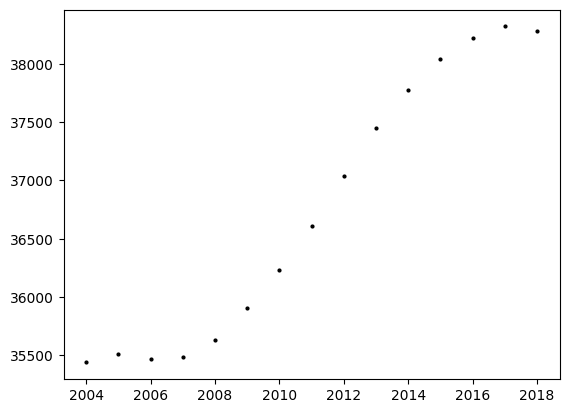

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statistics

t, N = np.loadtxt('datos-sigmoide.dat', usecols=(0,1), unpack=True)
plt.plot(t,N, 'ok', markersize=2)

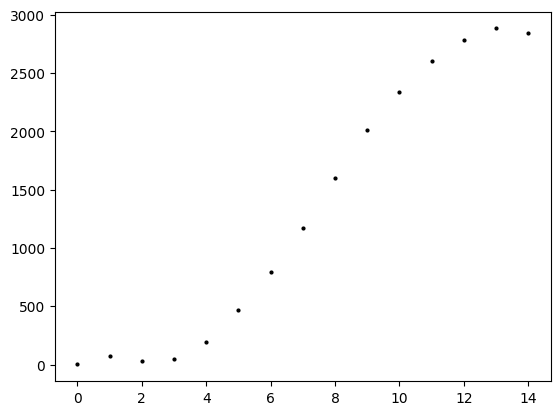

In [14]:
t=t-t.min()
N=N-min(N)+1
plt.plot(t,N, 'ok', markersize=2)

In [15]:
N0=N[0]
K_list = np.linspace(max(N)+1, max(N)+min(N), 10**5) #Escogemos los K para que no estén muy lejos de el valor máximo de N
N2 = np.zeros(len(N))
r_list = []
t=t.reshape((-1,1))
for K in K_list:
    for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i]))
    model = LinearRegression().fit(t, N2)
    r_list.append(model.score(t, N2))


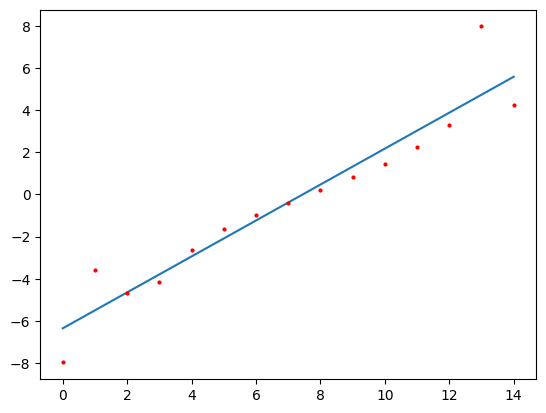

K= 2883.7999999999956
R^2= 0.9070615391427045
r= 0.8519671616484835


In [16]:
K=K_list[np.argmax(r_list)]
#K=59000
for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i]))
model = LinearRegression().fit(t, N2)
r=model.coef_[0]
#r=0.0184
t_part = np.linspace(t.min(),t.max(), 10**6)
C=model.intercept_
#C=np.log(N0/(K-N0))
#C=0.375
recta=[]
for i in t_part:
     recta.append(C+i*r)
plt.plot(t_part,recta)
plt.plot(t,N2, 'or', markersize=2)
plt.show()
print('K=', K)
print('R^2=', max(r_list))
print('r=', r)

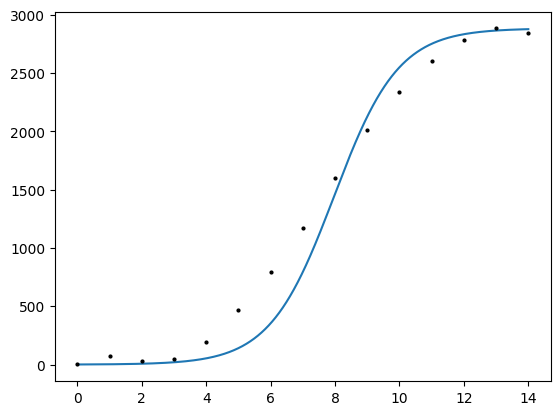

In [17]:
sigmoide = np.zeros(len(t_part))
r= 1
for i in range(len(t_part)):
    sigmoide[i]=(K*N0)/(N0+(K-N0)*np.exp(-r*t_part[i]))
plt.plot(t_part, sigmoide)
plt.plot(t,N, 'ok', markersize=2)
plt.savefig('sig_aprox.png')


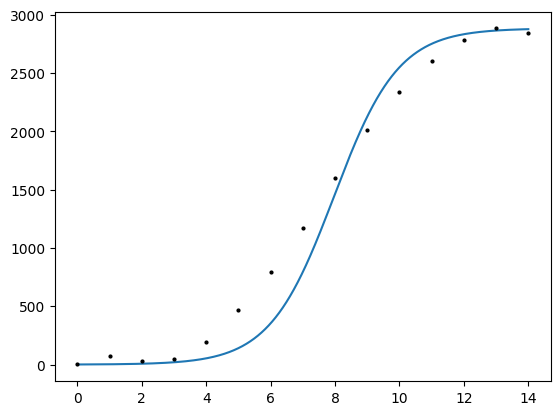

In [18]:
sigmoide = np.zeros(len(t_part))

for i in range(len(t_part)):
    sigmoide[i]=(K*N0)/(N0+(K-N0)*np.exp(-r*t_part[i]))
plt.plot(t_part, sigmoide)
plt.plot(t,N, 'ok', markersize=2)
plt.savefig('sig_aprox.png')